In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm.auto import tqdm
import pickle

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00


## Load the data

## Train and Validation Split

In [ ]:
# run for second time
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_data_lemmatizer.csv"
preprocessed_data_path = folder_path + file_path
train_df = pd.read_csv(preprocessed_data_path)
test_file_path = "preprocessed_test_version_2_lemmatizer.csv"
test_df = pd.read_csv(folder_path + test_file_path)
# /content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_version_2_lemmatizer.csv

In [ ]:
# run for second time
train_df.head()

,id,category,text
0,2009.0642,cs,completely self supervised crowd counting via ...
1,2010.13821,cs,wavelet flow fast training high resolution nor...
2,1904.12782,math,transversally elliptic complex cohomological f...
3,2105.00878,math,malliavin rubel theorem small entire function ...
4,1906.04024,math,odd cycle game connected rule study positional...


In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
X_train = train_df["text"]
y_train = train_df["category"]
X_test = test_df["text"]
y_test = test_df["category"]

In [ ]:
# run for second time
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(train_df["category"])

label = le.transform(train_df["category"])

In [ ]:
category_list = train_df.category.unique()

In [ ]:
label_list = list(range(0, 23))
le.inverse_transform(label_list)

array(['alg-geom', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'funct-an', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics',
       'q-alg', 'q-bio', 'q-fin', 'quant-ph', 'stat'], dtype=object)

In [ ]:
y_train_label = le.transform(y_train)
y_test_label = le.transform(y_test)

In [ ]:
train_df.category.nunique()

23

In [ ]:
train_df.category.value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
q-alg            2
funct-an         1
alg-geom         1
Name: category, dtype: int64

## Tokenization

In [ ]:
# run for second time
UNIQUE_WORD_COUNT = 30_000
MAX_PAD_LENGTH = 140

In [ ]:
# run for second time
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = UNIQUE_WORD_COUNT)

In [ ]:
# tokenizer.fit_on_texts(X_train)

In [ ]:
# # saving
# folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
# tokenizer_path = 'tokenizer.pickle'
# with open(folder_path + tokenizer_path, 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# run for second time
# loading
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

## One Hot Encoding for X data

In [ ]:
X_train

0         completely self supervised crowd counting via ...
1         wavelet flow fast training high resolution nor...
2         transversally elliptic complex cohomological f...
3         malliavin rubel theorem small entire function ...
4         odd cycle game connected rule study positional...
                                ...                        
861227    kernel quadrature applying point wise gradient...
861228    deepqtmt deep learning approach fast qtmt base...
861229    lightchain dht based blockchain resource const...
861230    vqsgd vector quantized stochastic gradient des...
861231    high efficient polarization independent edge c...
Name: text, Length: 861232, dtype: object

In [ ]:
# run for second time
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(train_padded[0])

[1428, 213, 510, 3154, 1845, 127, 57, 816, 954, 3154, 1845, 484, 52, 1087, 1839, 2159, 1460, 69, 1, 1580, 150, 213, 510, 15, 356, 441, 564, 93, 661, 1378, 4, 209, 59, 191, 52, 99, 205, 2342, 465, 28, 1290, 537, 213, 2060, 347, 189, 98, 1378, 36, 169, 639, 723, 3734, 40, 41, 2282, 3154, 36, 680, 628, 157, 3154, 1794, 106, 181, 2, 825, 336, 3154, 1495, 117, 487, 57, 356, 4455, 584, 123, 146, 4604, 99, 8452, 43, 3409, 213, 2060, 57, 121, 3122, 439, 1896, 8331, 249, 13, 72, 9, 6, 180, 10, 3154, 59, 6024, 292, 1845, 31, 361, 664, 2848, 2, 454, 4, 236, 46, 172, 1, 15, 250]
[1428  213  510 3154 1845  127   57  816  954 3154 1845  484   52 1087
 1839 2159 1460   69    1 1580  150  213  510   15  356  441  564   93
  661 1378    4  209   59  191   52   99  205 2342  465   28 1290  537
  213 2060  347  189   98 1378   36  169  639  723 3734   40   41 2282
 3154   36  680  628  157 3154 1794  106  181    2  825  336 3154 1495
  117  487   57  356 4455  584  123  146 4604   99 8452   43 3409  213


In [ ]:
# run for second time
val_sequences = tokenizer.texts_to_sequences(X_test)
print(val_sequences[0])
val_padded = pad_sequences(val_sequences, maxlen = MAX_PAD_LENGTH, padding = "post", truncating = "post")
print(val_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

## Over Sampling and Under Sampling of the datasets

In [ ]:
# value_counts_y_train = list(y_train.value_counts().sort_index())
# label_list = list(range(0, 23))
# category_list = le.inverse_transform(label_list)
# sns.set(rc={"figure.figsize":(20, 8)})
# sns.barplot(x = category_list, y = value_counts_y_train)

In [ ]:
# print(value_counts_y_train)

In [ ]:
# [i for i in value_counts_y_train if i < 3000]

From graph, it is clear that the data is highly imbalanced.

For balancing the data
1. Oversample the data with count  < 15_000 to 15_000
2. Under sample the data with count  > 50_000 to 50_0000

In [ ]:
# count_dict_oversample = {}
# threshold_1 = 3_000
# for i in range(23):
#   if value_counts_y_train[i] < threshold_1:
#     count_dict_oversample[i] = threshold_1
#   else:
#     count_dict_oversample[i] = value_counts_y_train[i]
# count_dict_oversample

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ns = RandomOverSampler(count_dict_oversample)
# X_train_ns, y_train_ns = ns.fit_resample(train_padded, y_train)

In [ ]:
# y_train_ns.nunique()

In [ ]:
# y_train_ns

In [ ]:
# value_counts_y_train_ns = list(y_train_ns.value_counts().sort_index())

# label_list = list(range(0, 23))
# category_list = le.inverse_transform(label_list)

# sns.set(rc={"figure.figsize":(20, 8)})
# sns.barplot(x = category_list, y = value_counts_y_train_ns)

In [ ]:
# print(value_counts_y_train_ns)

Hence, we have oversampled the value with count < 25_000 to 25_000, now we have to undersample the data with count  > 50_000 to 50_000

In [ ]:
# count_dict_undersample = {}
# threshold = 15_000
# for i in range(23):
#   if value_counts_y_train_ns[i] > threshold:
#     count_dict_undersample[i] = threshold
#   else:
#     count_dict_undersample[i] = value_counts_y_train_ns[i]
# count_dict_undersample

In [ ]:
# y_train_ns

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# under_sampler = RandomUnderSampler(count_dict_undersample)
# X_train_under, y_train_under = under_sampler.fit_resample(X_train_ns, y_train_ns)

In [ ]:
# X_train_ns

In [ ]:
# X_train_under

In [ ]:
# y_train_under

In [ ]:
# value_counts_y_train_under = list(y_train_under.value_counts().sort_index())

# label_list = list(range(0, 23))
# category_list = le.inverse_transform(label_list)

# sns.set(rc={"figure.figsize":(20, 8)})
# sns.barplot(x = category_list, y = value_counts_y_train_under)

Still, data seems to be unbalanced

# Class Weights

In [ ]:
# def class_weight(labels_dict,mu=0.15):
#   total = np.sum(list(labels_dict.values()))
#   keys = labels_dict.keys()
#   weight = dict()

#   for i in keys:
#       score = np.log(mu*total/float(labels_dict[i]))
#       weight[i] = score if score > 1 else 1
#   return weight

In [ ]:
# labels_dict = y_train_under.value_counts().to_dict()
# labels_dict

In [ ]:
# np.sum(list(labels_dict.values()))

In [ ]:
# total = np.sum(labels_dict.values())
# type(total), total

In [ ]:
# class_weights = class_weight(labels_dict)
# class_weights

In [ ]:
# from sklearn.utils import class_weight

In [ ]:
# y_train_under

In [ ]:
# np.unique(y_train_under)

In [ ]:
# class_weights = class_weight.compute_class_weight(
#     class_weight = "balanced", 
#     classes = np.unique(y_train_under), 
#     y = y_train_under)

# class_weights = dict(zip(np.unique(y_train_under), class_weights))
# class_weights

# One Hot Encoding for y data

In [ ]:
y_train_label

array([ 3,  3, 12, ...,  3,  3, 17])

In [ ]:
y_test_label

array([20,  2, 12, ...,  3,  5,  3])

In [ ]:
from keras.utils import np_utils
y_train_enc = np_utils.to_categorical(y_train_label)
N_CLASSES = len(y_train_enc[0])
y_test_enc = np_utils.to_categorical(y_test_label, num_classes=N_CLASSES)

In [ ]:
N_CLASSES

23

## Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import regularizers
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
N_CLASSES, MAX_PAD_LENGTH

(23, 140)

In [ ]:
def build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH):
  model = Sequential([
    Embedding(UNIQUE_WORD_COUNT, output_dim = 64, input_length = pad_length),
    LSTM(units = 10, dropout = 0.3),
    
    Dense(128, activation='relu', kernel_initializer= 'glorot_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(n_classes, activation='softmax')
  ])

  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizer, 
      metrics=[tf.keras.metrics.CategoricalAccuracy(),
                tfa.metrics.F1Score(num_classes=n_classes, average='macro'),
                tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')])
  model.summary()
  return model

In [ ]:
train_padded.shape

(861232, 140)

In [ ]:
train_padded.shape[1]

140

In [ ]:
model = build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 64)           1920000   
                                                                 
 lstm (LSTM)                 (None, 10)                3000      
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 23)                2967      
                                                        

In [ ]:
EPOCHS = 15

In [ ]:
history = model.fit(train_padded, y_train_enc, batch_size=128, epochs=EPOCHS, validation_data=(val_padded, y_test_enc))

Epoch 1/15
6729/6729 [==============================] - 80s 11ms/step - loss: 1.2092 - categorical_accuracy: 0.6187 - f1_score: 0.2071 - fbeta_score: 0.2104 - val_loss: 1.0613 - val_categorical_accuracy: 0.6494 - val_f1_score: 0.2438 - val_fbeta_score: 0.2460
Epoch 2/15
6729/6729 [==============================] - 70s 10ms/step - loss: 1.0589 - categorical_accuracy: 0.6519 - f1_score: 0.2578 - fbeta_score: 0.2572 - val_loss: 1.0540 - val_categorical_accuracy: 0.6533 - val_f1_score: 0.2495 - val_fbeta_score: 0.2523
Epoch 3/15
6729/6729 [==============================] - 72s 11ms/step - loss: 1.0021 - categorical_accuracy: 0.6652 - f1_score: 0.2937 - fbeta_score: 0.2901 - val_loss: 0.9715 - val_categorical_accuracy: 0.6713 - val_f1_score: 0.3122 - val_fbeta_score: 0.3138
Epoch 4/15
6729/6729 [==============================] - 72s 11ms/step - loss: 0.9385 - categorical_accuracy: 0.6762 - f1_score: 0.3322 - fbeta_score: 0.3306 - val_loss: 0.9321 - val_categorical_accuracy: 0.6731 - val_f1_

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model_sequential_v4"
model.save(model_path)

In [ ]:
import pickle
# save the history of the model
history_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/historyV4"
with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
# read the history
with open(history_path, "rb") as file_pi:
    history = pickle.load(file_pi)

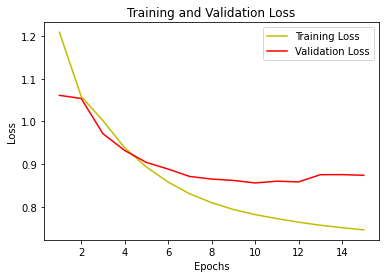

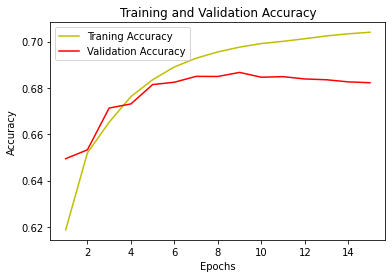

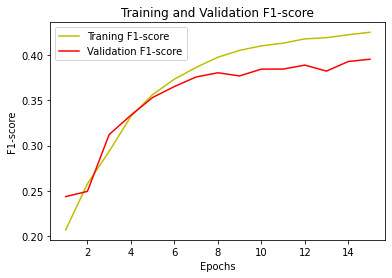

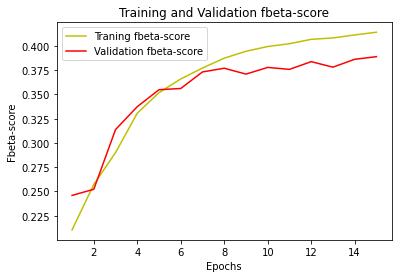

In [ ]:
def historyVisualization(history):
  #plot the training and validation accuracy and losss at each epoch
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  print()

  acc = history['categorical_accuracy'] 
  val_acc = history['val_categorical_accuracy']
  plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
  plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  print()

  acc = history['f1_score'] 
  val_acc = history['val_f1_score']
  plt.plot(epochs, acc, 'y', label = "Traning F1-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation F1-score")
  plt.title("Training and Validation F1-score")
  plt.xlabel("Epochs")
  plt.ylabel("F1-score")
  plt.legend()
  plt.show()

  print()
  
  acc = history['fbeta_score'] 
  val_acc = history['val_fbeta_score']
  plt.plot(epochs, acc, 'y', label = "Traning fbeta-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation fbeta-score")
  plt.title("Training and Validation fbeta-score")
  plt.xlabel("Epochs")
  plt.ylabel("Fbeta-score")
  plt.legend()
  plt.show()

historyVisualization(history)

# Comparision  of test data

# Load model and predict for submission

In [ ]:
from keras.models import load_model
import pandas as pd
import pickle
import numpy as np

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
n_classes = 23

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model_sequential_v4"
loaded_model = load_model(model_path, custom_objects={"categorical_accuracy" : tf.keras.metrics.CategoricalAccuracy(), 
                                                               "f1_score" :  tfa.metrics.F1Score(num_classes=n_classes, average='macro'), 
                                                               "fbeta_score" : tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')
                                                               })

In [ ]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_version_2_lemmatizer.csv" 
test_df = pd.read_csv(test_file_path)

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


### Tokenization of test data

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
MAX_PAD_LENGTH = 140

In [ ]:
X_test = test_df.text

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(test_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

In [ ]:
y_test_predict = loaded_model.predict(test_padded)

1369/1369 [==============================] - 5s 4ms/step


In [ ]:
type(y_test_predict)

numpy.ndarray

In [ ]:
y_test_predict.shape

(43785, 23)

In [ ]:
y_test_predict[0], y_test_predict[1]

(array([4.97095076e-09, 5.31659927e-03, 2.62608975e-02, 2.61448503e-01,
        1.07029036e-01, 3.94911924e-03, 1.21140031e-08, 4.27129853e-04,
        6.34554963e-05, 6.18252088e-05, 2.48295517e-04, 5.36016829e-04,
        5.95752597e-02, 6.52353570e-04, 2.67177075e-02, 1.43967764e-05,
        5.00955684e-05, 2.79036671e-01, 2.77532504e-08, 8.55791569e-02,
        3.36219072e-02, 2.27764132e-04, 1.09183744e-01], dtype=float32),
 array([1.1537093e-14, 4.1280779e-05, 8.9260757e-01, 9.3659881e-05,
        2.3304070e-09, 8.8692004e-06, 3.3057744e-14, 1.2842972e-06,
        1.3109154e-05, 3.7357488e-06, 1.8711533e-05, 1.0720441e-05,
        2.8856412e-05, 1.2242444e-06, 4.8905909e-05, 8.9230016e-05,
        1.7737978e-04, 1.0438804e-01, 9.8629199e-13, 1.6493321e-05,
        9.9570474e-10, 2.4364882e-03, 1.4497827e-05], dtype=float32))

In [ ]:
y_predicted = np.argmax(y_test_predict, axis = 1)

In [ ]:
y_predicted

array([17,  2, 22, ...,  3,  3,  3])

In [ ]:
y_true = le.transform(test_df.category)
y_true

array([20,  2, 12, ...,  3,  5,  3])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84      3012
           2       0.69      0.79      0.74      3652
           3       0.71      0.89      0.79     13308
           4       0.42      0.27      0.33       199
           5       0.35      0.10      0.16      1734
           7       0.45      0.56      0.50       794
           8       0.40      0.28      0.33       375
           9       0.31      0.33      0.32       127
          10       0.49      0.52      0.50       979
          11       0.47      0.35      0.40       996
          12       0.79      0.78      0.78      9059
          13       0.33      0.00      0.00       608
          14       0.34      0.21      0.26       305
          15       0.31      0.25      0.27       186
          16       0.39      0.44      0.42       342
          17       0.62      0.48      0.54      3390
          19       0.44      0.36      0.40       535
          20       0.58    

In [ ]:
predicted_labels = le.inverse_transform(y_predicted)
print(predicted_labels)

['physics' 'cond-mat' 'stat' ... 'cs' 'cs' 'cs']


In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submitted_df = test_df.copy(deep = True)
submitted_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submitted_df.category = predicted_labels

In [ ]:
submitted_df.head()

,id,category,text
0,2107.01095,physics,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submitted_df.drop("text", axis = 1, inplace = True)
submitted_df.head()

,id,category
0,2107.01095,physics
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math


In [ ]:
submitted_df.head()

,id,category
0,2107.01095,physics
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math


In [ ]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/submission_seq_v4.csv"
submitted_df.to_csv(submission_path,index = False)

In [ ]:
len(predicted_labels)

43785

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
test_df.hea

In [ ]:
len(test_df)

43785

In [ ]:
import random

In [ ]:
def viewTextCategory(df, number = 10):
  sample_df = df.sample(number)
  for text, category in zip(sample_df["text"], sample_df["category"]):
    print("========================")
    print(category)
    print(text)

In [ ]:
viewTextCategory(test_df, number = 5)

astro-ph
wide field vlba calibrator survey wfcs paper present result largest date vlbi absolute astrometry campaign observation 13645 radio source long baseline array vlba 7220 detected including 6755 target source never observed vlbi make present vlbi catalogue largest ever published position target source determined median uncertainty 17 ma 15599 image 7179 source generated unlike previous absolute radio astrometry campaign observation made 43 76 ghz simultaneously using single wide band receiver fine spectral time resolution field view 4 8 arcminute much greater 10 20 arcsecond previous survey made possible use input catalogue low position accuracy detect compact component extended source unlike previous absolute astrometry campaign steep flat spectrum source observed observation scheduled called fill mode fill gap high priority program achieved development totally automatic scheduling procedure
cs
emotional embeddings refining word embeddings capture emotional content word word emb

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submission_df = test_df.drop("text", axis = 1)

In [ ]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/submission_seq_v4.csv"
submission_df.to_csv(submission_path,index = False)

In [ ]:
submission_df.head(10)

,id,category
0,2107.01095,q-fin
1,1906.08519,cond-mat
2,2105.05523,math
3,1906.08731,cs
4,1703.08445,math
5,2106.13444,cond-mat
6,1812.05778,cs
7,1911.0796,cs
8,1808.07576,stat
9,1902.02865,cs


In [ ]:
test_df.head(10)

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...
5,2106.13444,cond-mat,surface density state semi infinite topologica...
6,1812.05778,cs,trivial yet optimal solution vertex fault tole...
7,1911.0796,cs,alphamu search algorithm game bridge alphamu a...
8,1808.07576,stat,cooperative sgd unified framework design analy...
9,1902.02865,cs,eyeorg platform crowdsourcing web quality expe...


In [ ]:
test_df.iloc[1].text

'crystal structure magnetic property 5d transition metal oxide aoso4 k rb c synthesized 5d1 transition metal oxide aoso4 k rb c solid state reaction performed structure determination magnetic heat capacity measurement found crystallize scheelite k rb quasi scheelite structure c comprising distorted diamond lattice septivalent o d1 ion tetrahedrally coordinated four oxide ion without local inversion symmetry hence antisymmetric spin orbit coupling expected crystal k rb compound wei temperature theta 66 18 k effective magnetic moment mueff 144 145 mubos antiferromagnetic transition temperature tn 369 210 k respectively contrast c compound theta 12 k mueff 08 mubos without magnetic transition 2 k instead exhibiting first order structural transition t 1525 k decline o moment 173 mubos simple d1 spin particularly c likely originate antiparallel orbital moment although spin orbit coupling generally quenched low lying e orbitals'